# Example linear model using TensorFlow 2
Example code for building and training a custom simple linear model using TensorFlow 2

In [1]:
%matplotlib inline
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model

In [4]:
N_EPOCHS = 10

Example data generated from a cubic function, that can be fitted using model

$$$

f(x) = Ax^{3} + Bx^{2} + Cx + D

$$$

In [5]:
X = np.linspace(0, 5, 1000, dtype=np.float32)


def f(x, a: float, b: float, c: float, d: float):
    return a * x ** 3 + b * x ** 2 + c * x + d


y = f(X, a=2, b=-4, c=-22, d=24)

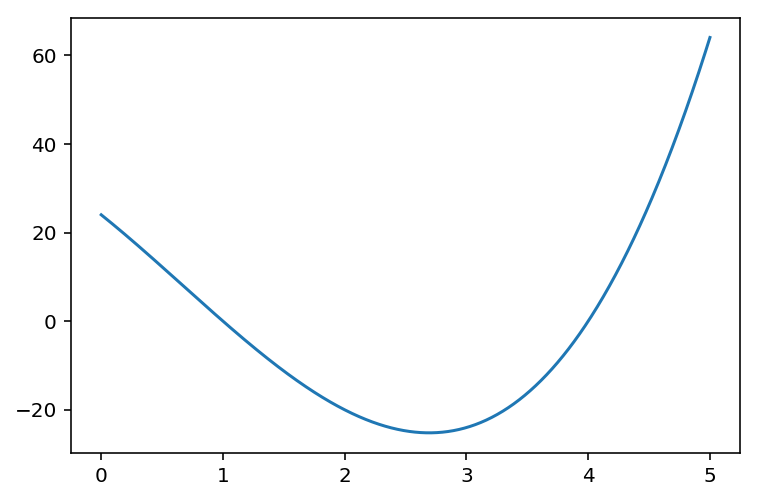

In [6]:
plt.plot(X, y)

In [7]:
data = tf.data.Dataset.from_tensor_slices((X, y)).repeat(N_EPOCHS)

In [8]:
class LinearModel(Model):
    def __init__(self):
        super().__init__()
        self.a = tf.Variable(1.0)
        self.b = tf.Variable(1.0)
        self.c = tf.Variable(1.0)
        self.d = tf.Variable(1.0)

    def call(self, x: tf.Tensor):
        return self.a * x ** 3 + self.b * x ** 2 + self.c * x + self.d

In [9]:
model = LinearModel()

In [10]:
def loss(y: tf.Tensor, pred: tf.Tensor):
    return tf.reduce_mean(tf.square(y - pred))

In [11]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.2)

In [12]:
def train(model: Model, x: tf.Tensor, y: tf.Tensor):
    with tf.GradientTape() as tape:
        predictions = model(x)
        _loss = loss(y, predictions)
    gradients = tape.gradient(_loss, model.trainable_variables)
    optimiser.apply_gradients(zip(gradients, model.trainable_variables))

In [13]:
for epoch in range(N_EPOCHS):
    for inputs, labels in data.shuffle(X.shape[0]).batch(32):
        train(model, inputs, labels)

In [14]:
model.a

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.1183476>

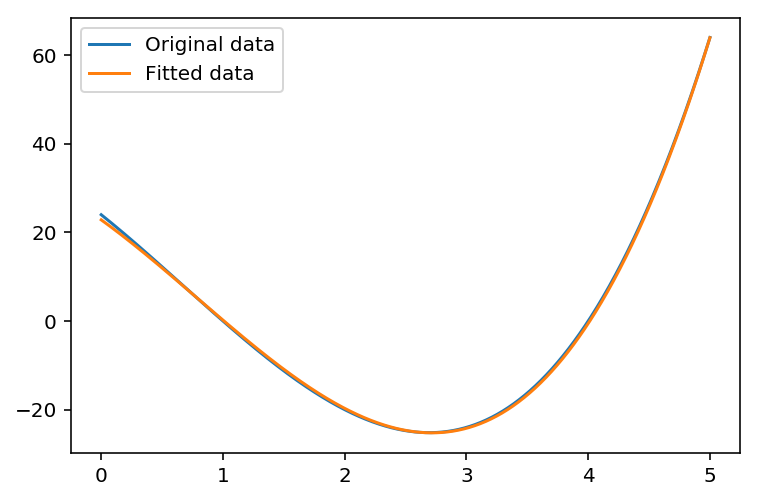

In [15]:
y_preds = model(X)
plt.plot(X, y, label="Original data")
plt.plot(X, y_preds, label="Fitted data")
plt.legend()